# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Dataset Loading

In [ ]:
# Load Dataset
df_store = pd.read_csv('/content/store.csv')
df_rossmann=pd.read_csv('/content/Rossmann Stores Data.csv')

Analysing the rossmann dataset:


In [ ]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


#checking information about the dataset

In [ ]:
#checking information of data such as column, row and datatype:
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#checking null values
df_rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

there are no null values in the dataset


#descriptive statistics of the dataset:

In [ ]:
#summary of statistics:
df_rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


the above given data is numerical data in the column

In [ ]:
df_rossmann.describe(include=['object','category'])

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2015-07-31,0
freq,1115,855087


the above given data is a categorical data 

In [ ]:
#no. of stores in the dataset
df_rossmann['Store'].nunique()

1115

In [ ]:
# taking counting number of each catagory 
df_rossmann['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#There are two types of datatype found: one is integer and the other is string
#So there is neccesity to convert a integer into string as there is only one integer value
df_rossmann['StateHoliday'].replace(0,'0',inplace=True) 

In [ ]:
#value counts of state holiday columns
df_rossmann['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#Finding out the time duration of sales for which the data is given
print(df_rossmann['Date'].min(),'initial_date')
print(df_rossmann['Date'].max(),'final_date')


2013-01-01 initial_date
2015-07-31 final_date


In [ ]:
#lets convert the date datatype to datetime datatype
df_rossmann["Date"]=pd.to_datetime(df_rossmann['Date'])
print((df_rossmann['Date'].max())-(df_rossmann['Date'].min()))


941 days 00:00:00


In [ ]:
#extracting year,month,day and week of year from "Date"
df_rossmann['year']=df_rossmann['Date'].dt.year
df_rossmann['month']=df_rossmann['Date'].dt.month
df_rossmann['day']=df_rossmann['Date'].dt.day
df_rossmann['week_of_year']=df_rossmann['Date'].dt.weekofyear

In [ ]:
df_rossmann.sort_values(['Date','Store'],inplace=True,ascending=[False,True])

In [ ]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


EDA ON ROSSMANN DATASET

<AxesSubplot:>

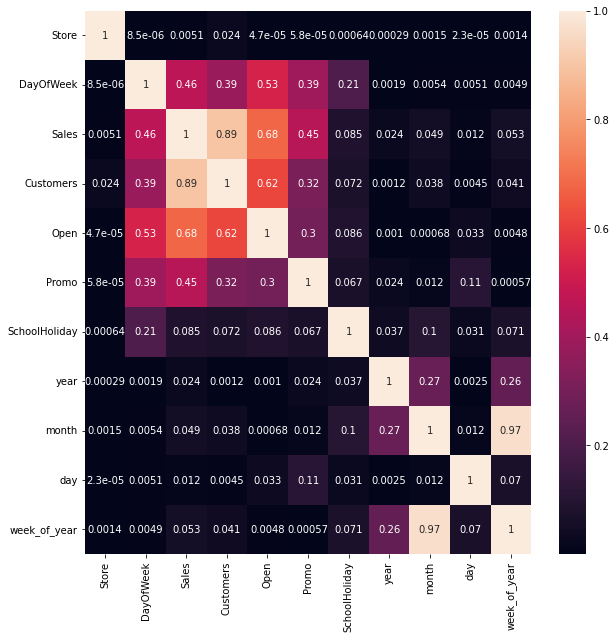

In [ ]:
#Lets finding out the correlation between diffrent varriables
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(abs(df_rossmann.corr()),cmap='rocket',annot=True)


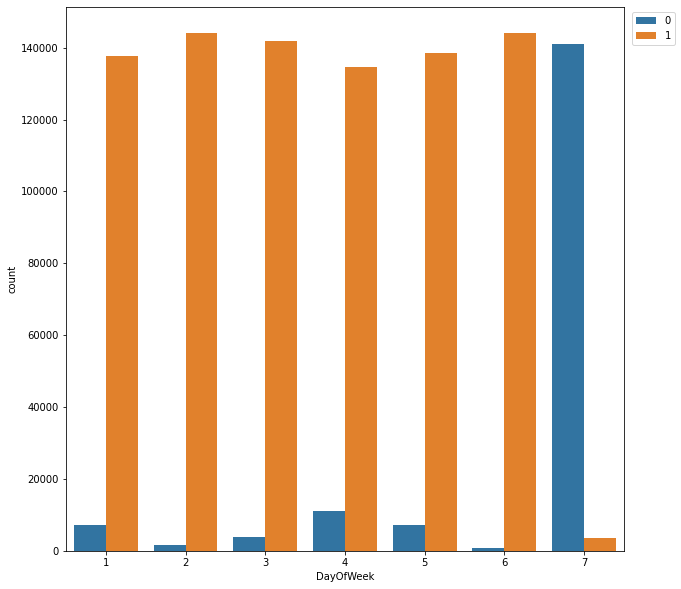

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(x='DayOfWeek',hue='Open',data=df_rossmann)
ax.legend(bbox_to_anchor=(1.1,1))

#it is seen that mostly stores are closed on sunday

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

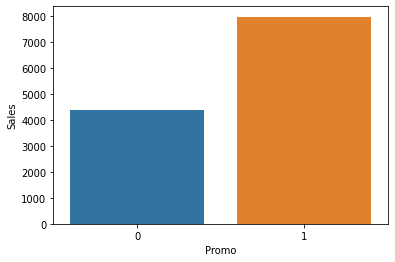

In [ ]:
#impact of promo on sales
Promo_sales=pd.DataFrame(df_rossmann.groupby('Promo')['Sales'].mean())
sns.barplot(x=Promo_sales.index,y=Promo_sales['Sales'])

according to this we can say that sales are more when there is promotion

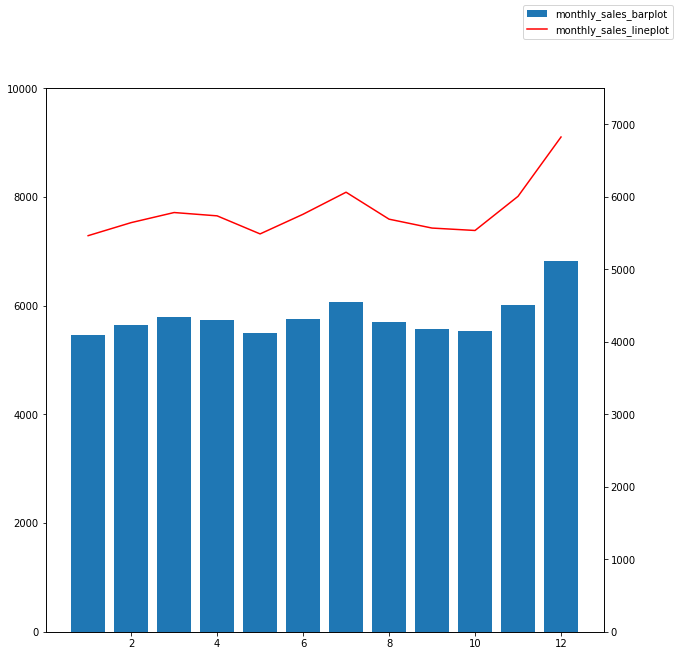

In [ ]:
monthly_sales=df_rossmann.groupby('month')['Sales'].mean()
fig,ax=plt.subplots(figsize=(10,10))
ax.bar(monthly_sales.index,monthly_sales,label='monthly_sales_barplot')
ax2=ax.twinx()
ax.set_ylim(0,10000)
ax2.plot(monthly_sales.index,monthly_sales,alpha=1,c='red',label='monthly_sales_lineplot')
ax2.set_ylim(0,7500)
fig.legend()
plt.show()

#so from this we can infer that in the month of november and december sales are increasing rapidly due to festival eve's

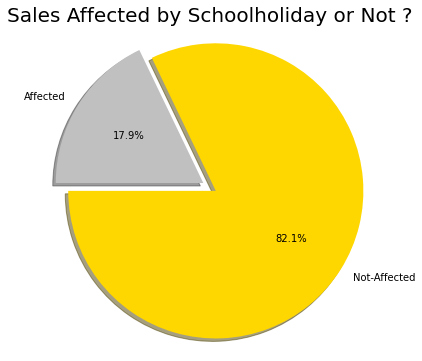

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rossmann.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

it is seen the sales affected by school holiday's is 18 percent 

Tranforming varriable state holiday

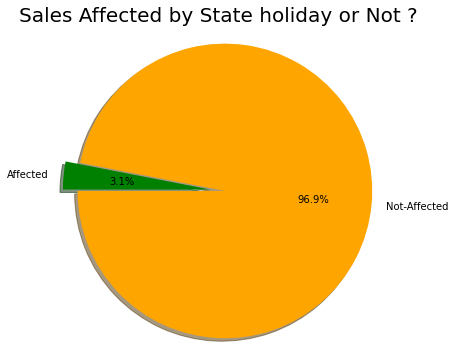

In [ ]:
df_rossmann["StateHoliday"] = df_rossmann["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
df_rossmann.StateHoliday.value_counts()
labels = 'Not-Affected' , 'Affected'
sizes = df_rossmann.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# so we can say that school holidays has more impact on sales and state holidays does not affect much

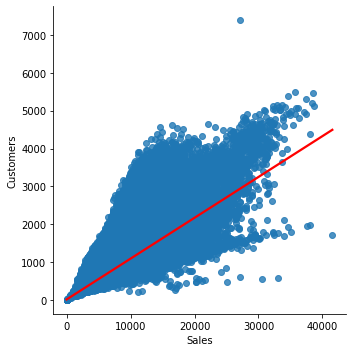

In [ ]:
sns.lmplot(x= 'Sales' , y ='Customers',data=df_rossmann, palette='seismic', height=5,aspect=1, line_kws={'color':'red'});

from this we can conclude that there is positive correlation between sales and customers

#Analysing the store dataset

In [ ]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Handling the null values

In [ ]:
df_store[df_store['CompetitionDistance'].isna()]
#since we find that many of the feature in these null values include null values hence we shall remove the null rows
df_store['CompetitionDistance'].dropna(inplace=True)
df_store[df_store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


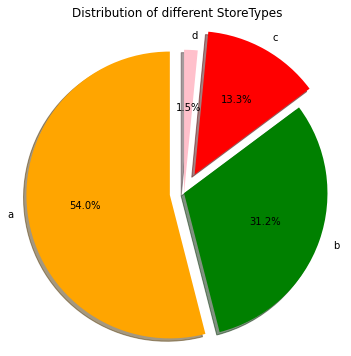

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = df_store.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

It is seen that majority of store are of 'a' type. 

Remove features with high percentages of missing values
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values

In [ ]:
df_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

In [ ]:
df_store.dropna(inplace=True)

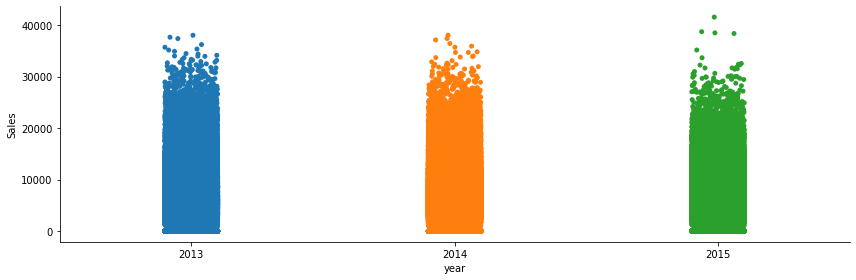

In [ ]:
sns.catplot(x='year',y='Sales',data=df_rossmann, height=4, aspect=3);


#Merging two dataset

In [ ]:
df_merged=df_rossmann.merge(df_store,how='left',on='Store')

In [ ]:
#lets view the top 5 rows of our merged dataset
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0.0


In [ ]:
#lets view the bottom 5 rows of our merged dataset
df_merged.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,a,1900.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,c,c,1880.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,c,9260.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,a,c,870.0,0.0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,d,c,5350.0,1.0


plotting the heatmap of merged dataset

<AxesSubplot:>

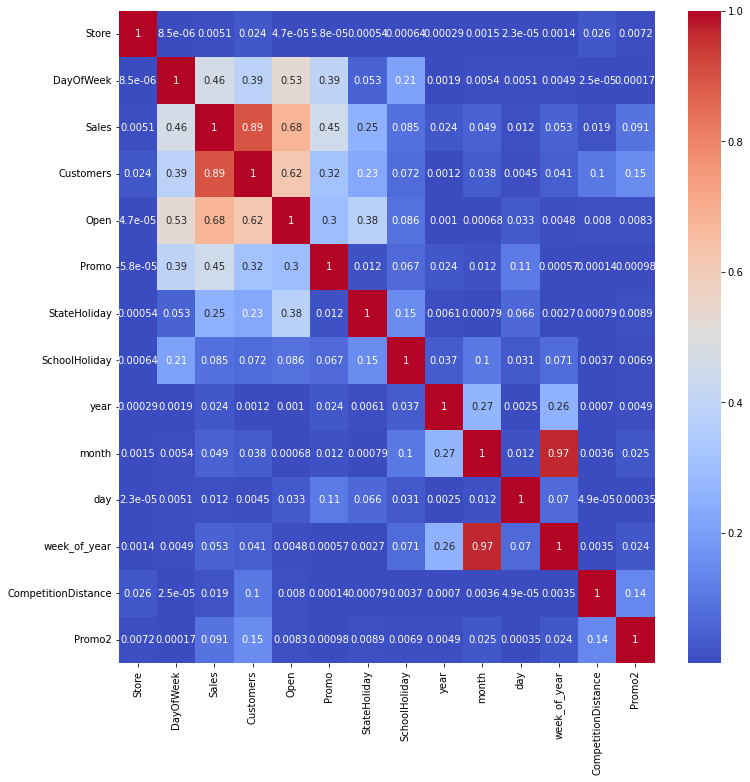

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(abs(df_merged.corr()),cmap='coolwarm',annot=True)

In [ ]:
df_merged["avg_customer_sales"]=df_merged["Sales"]/df_merged["Customers"]

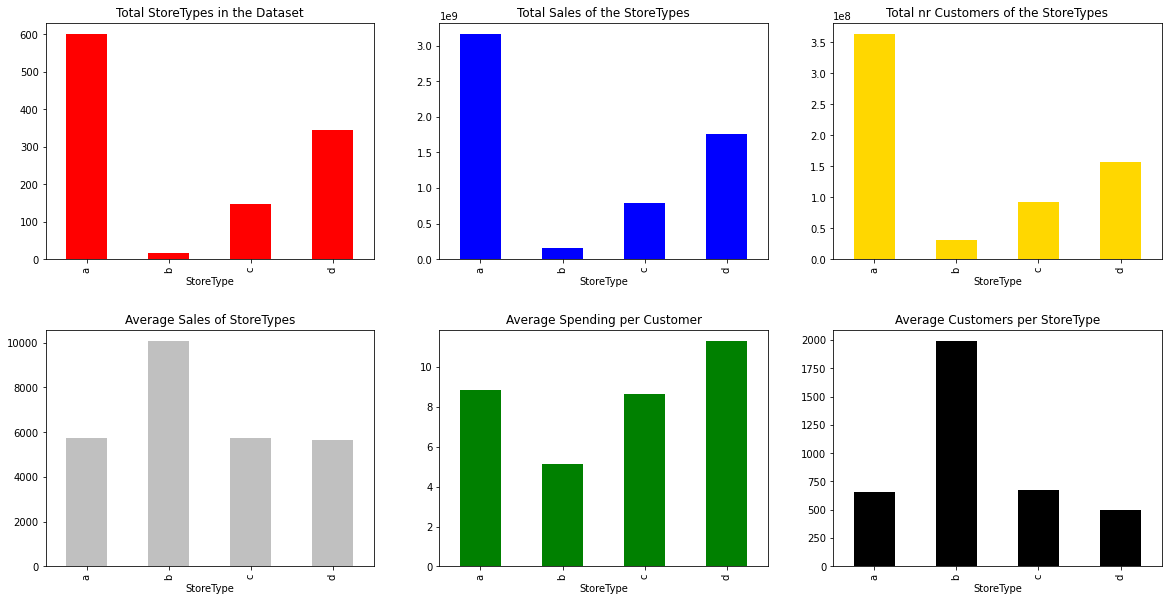

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df_store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset",color='red')
df_merged.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes",color='blue')
df_merged.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes",color='gold')
df_merged.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes",color='silver')
df_merged.groupby("StoreType")["avg_customer_sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color='green')
df_merged.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color='black')

plt.subplots_adjust(hspace = 0.3)
plt.show()



1. As we can see from the graph the store type A has the most stores,sales,customers
2.Storetype B has the highest average sales and average customers
3.Storetype D has the best average spendings per customer. 




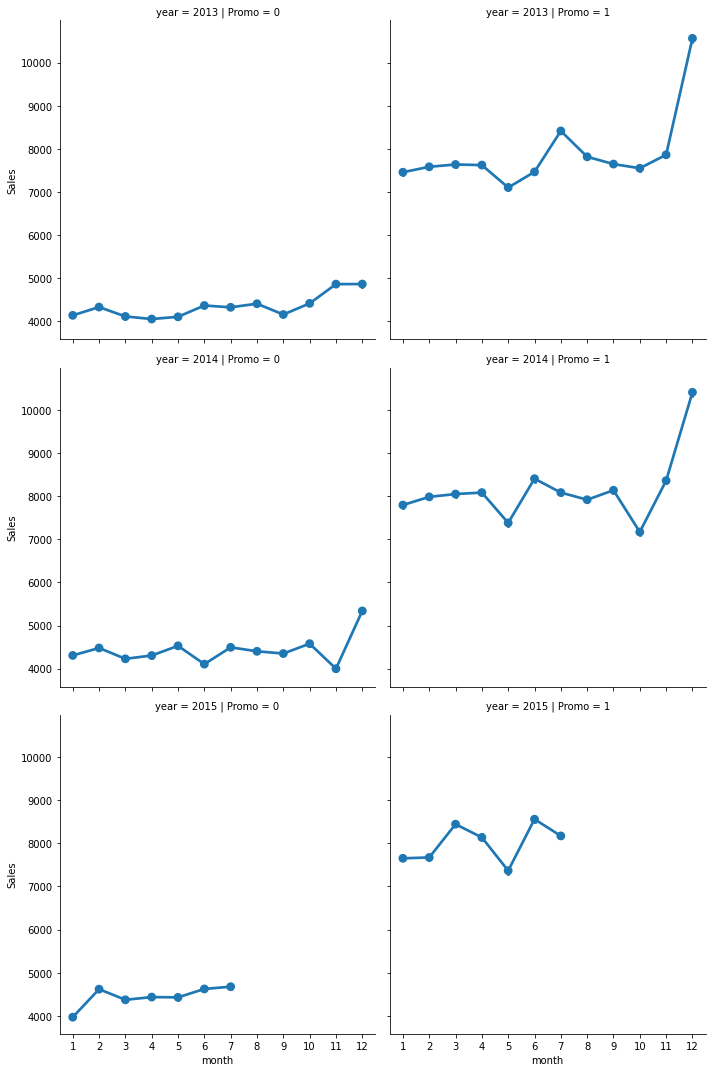

In [ ]:
#lets check the effect of promotion on sales
sns.factorplot(data = df_merged, x ="month", y = "Sales",col = 'Promo',row = "year")

so we can see that if the stores are having promotion the sales are higher.

Overall the store promotion sellings are higher than the seasonal promotion

#Conclusion of the analysis

In [ ]:
#when the stores are closed they will not generate sales so we will remove that part of the dataset
df_merged=df_merged[df_merged['Open']!=0]

In [ ]:
#since the open column now has only one open values through all the rows 
#so we shall remove this column as it is insignificant for our analysis
df_merged.drop('Open',axis=1,inplace=True)
df_merged

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0.0,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1.0,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1.0,10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0.0,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0.0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016827,733,2,2013-01-01,10765,2377,0,1,1,2013,1,1,1,b,b,860.0,0.0,4.528818
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455
1017042,948,2,2013-01-01,4491,1039,0,1,1,2013,1,1,1,b,b,1430.0,0.0,4.322425


In [ ]:
#checking if there is any open store with zero sales
df_merged[df_merged['Sales']==0]['Store'].count()

54

In [ ]:
#thus removing the above part of data to remove the bias
df_merged=df_merged[df_merged['Sales']!=0]
df_merged

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0.0,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1.0,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1.0,10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0.0,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0.0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016827,733,2,2013-01-01,10765,2377,0,1,1,2013,1,1,1,b,b,860.0,0.0,4.528818
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455
1017042,948,2,2013-01-01,4491,1039,0,1,1,2013,1,1,1,b,b,1430.0,0.0,4.322425


In [ ]:
#creating a copy of the dataset
df=df_merged.copy()

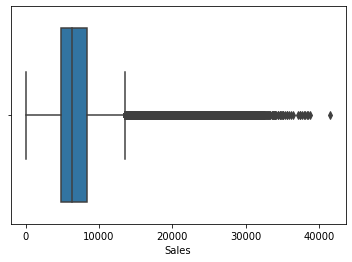

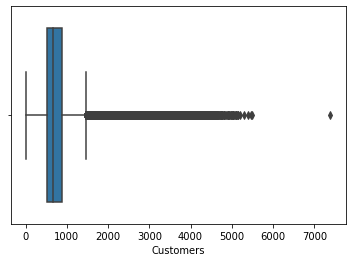

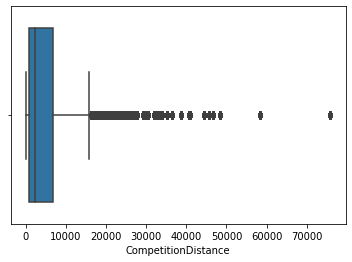

In [ ]:
#checking of outliers in our sales column
t=['Sales','Customers','CompetitionDistance']
for col in t:
  fig,ax=plt.subplots()
  sns.boxplot(x=col,data=df)

for sales,customers and competitiondistance column it is seen from the box plot that there are some which makes our analysis biased/ it may give more noise in our prediction.


In [ ]:
#dealing the outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
for i in t:
    df=remove_outlier(df,i)
df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0.0,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1.0,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1.0,10.126675
5,6,5,2015-07-31,5651,589,1,0,1,2015,7,31,31,a,a,310.0,0.0,9.594228
7,8,5,2015-07-31,8492,833,1,0,1,2015,7,31,31,a,a,7520.0,0.0,10.194478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,512,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,b,b,590.0,1.0,4.233600
1016770,676,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,b,b,1410.0,0.0,4.917632
1016776,682,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016863,769,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455


Removing the distinct columns

In [ ]:
df.drop('Store',axis=1,inplace=True)

In [ ]:
df

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
0,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0.0,9.482883
1,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1.0,9.702400
2,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1.0,10.126675
5,5,2015-07-31,5651,589,1,0,1,2015,7,31,31,a,a,310.0,0.0,9.594228
7,5,2015-07-31,8492,833,1,0,1,2015,7,31,31,a,a,7520.0,0.0,10.194478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,b,b,590.0,1.0,4.233600
1016770,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,b,b,1410.0,0.0,4.917632
1016776,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,b,a,150.0,0.0,5.962898
1016863,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,b,b,840.0,1.0,4.034455


categorising into numerical and categorical varriables

In [ ]:
numerical_varriable_list=(list(df.describe().columns))
numerical_varriable_list

['DayOfWeek',
 'Sales',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'year',
 'month',
 'day',
 'week_of_year',
 'CompetitionDistance',
 'Promo2',
 'avg_customer_sales']

In [ ]:
categorical_varriable_list=list(df.describe(include=['object','category']))
categorical_varriable_list

['StoreType', 'Assortment']

distribution of our numerical varriable

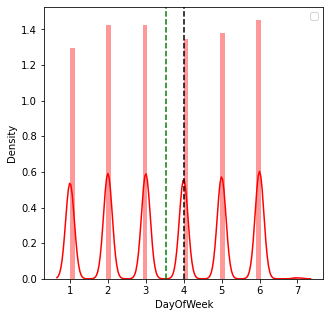

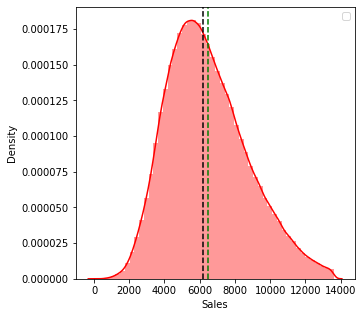

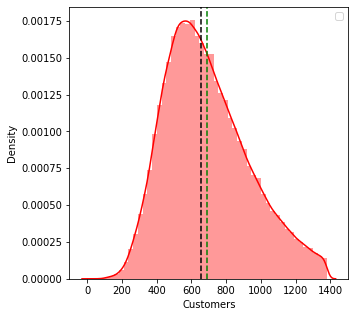

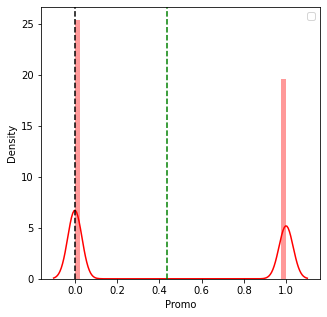

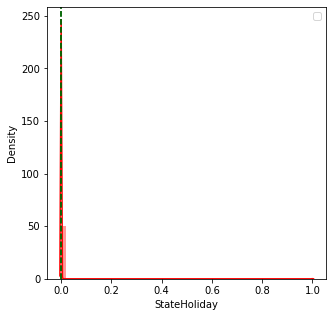

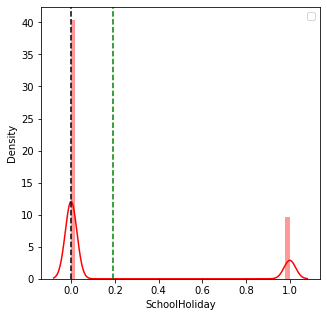

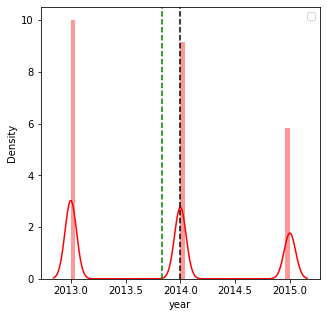

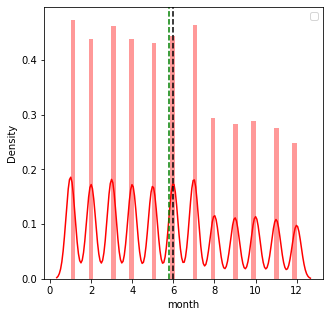

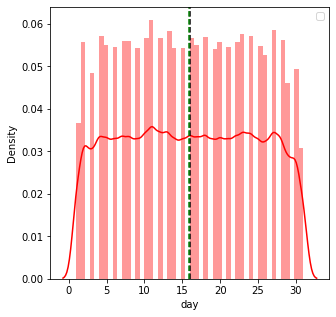

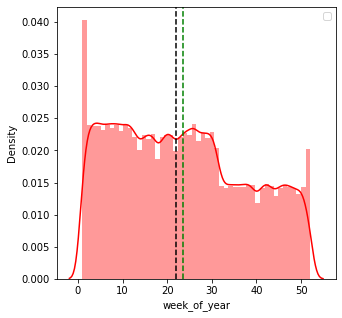

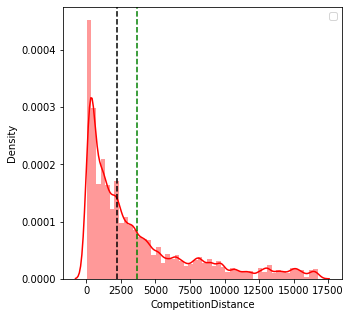

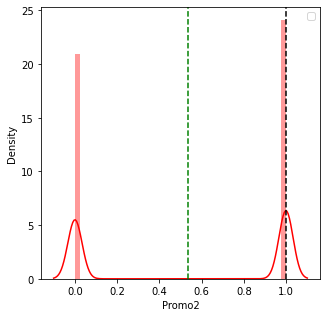

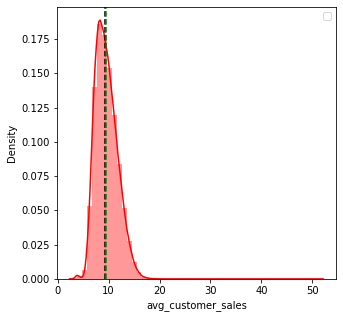

In [ ]:
for col in numerical_varriable_list:
    fig,ax=plt.subplots(figsize=(5,5))
    sns.distplot(df[col],color='red')
    ax.axvline(df[col].median(),color='black',ls='--')
    ax.axvline(df[col].mean(),color='green',ls='--')
    ax.legend()
    plt.show()

it is seen from the above graphs that there is not much skewness in our data.
Another reason behind the less skewness of our data is because of removal of outliers as it does not shifts our mean data predominantly.So this means that the mean and median are almost symmetrical and we need not do any transformation on our data.
Hence it is ready for our analysis.

In [ ]:
independent_numerical_varriable=list(set(numerical_varriable_list)-{'Sales'})

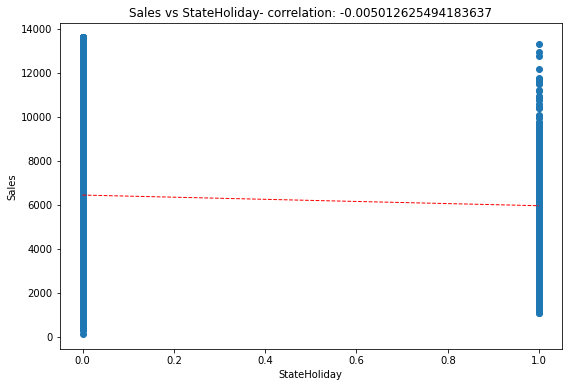

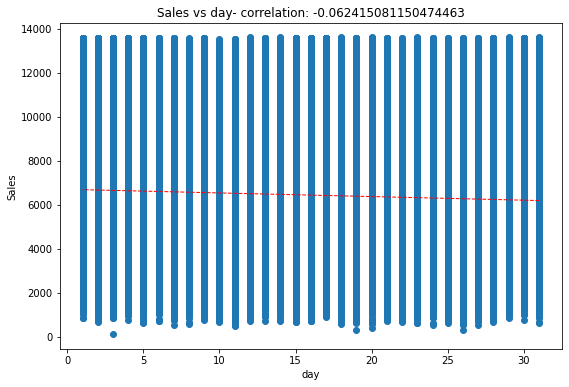

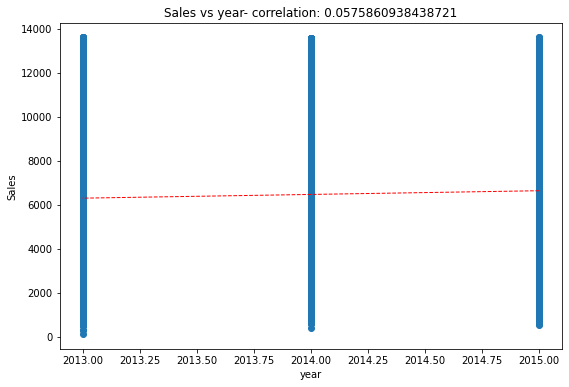

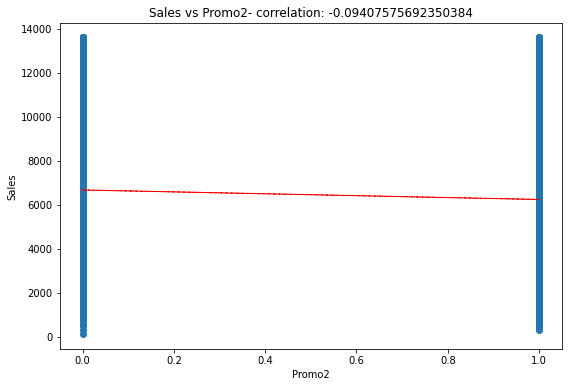

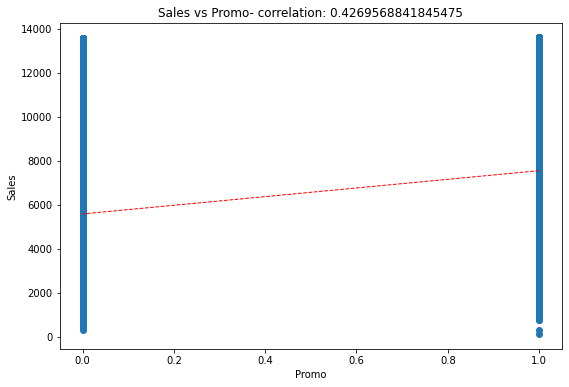

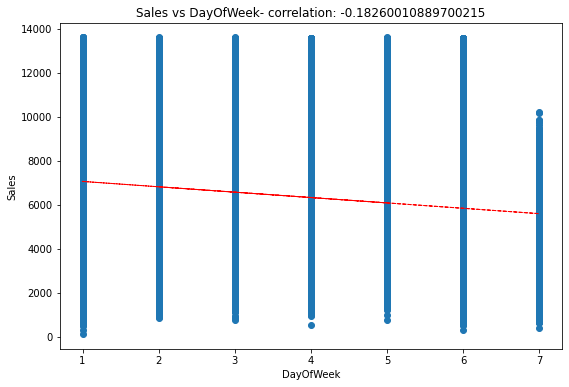

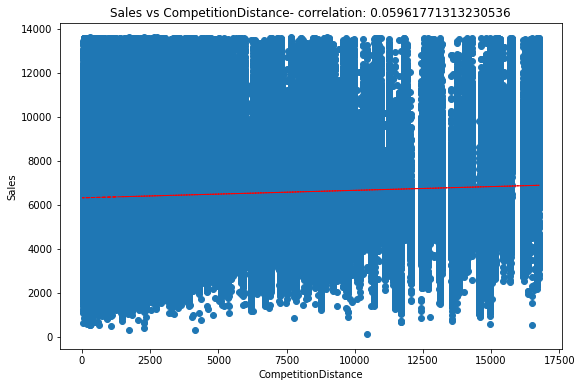

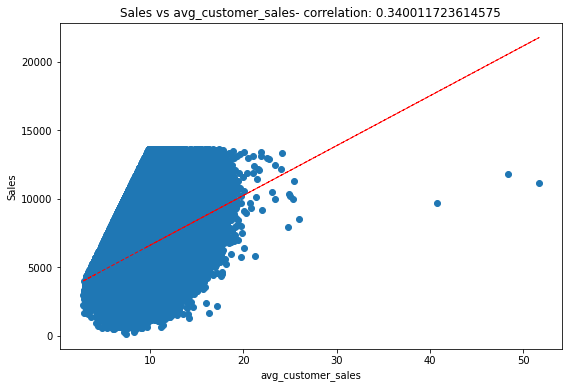

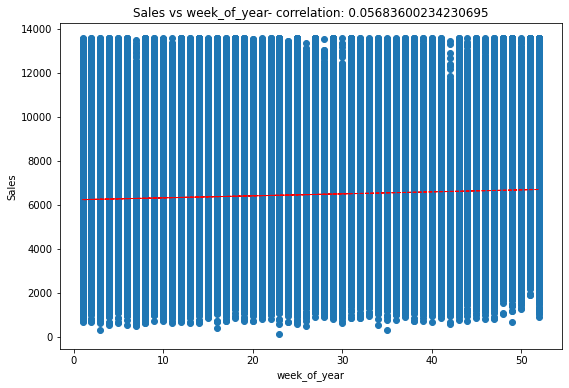

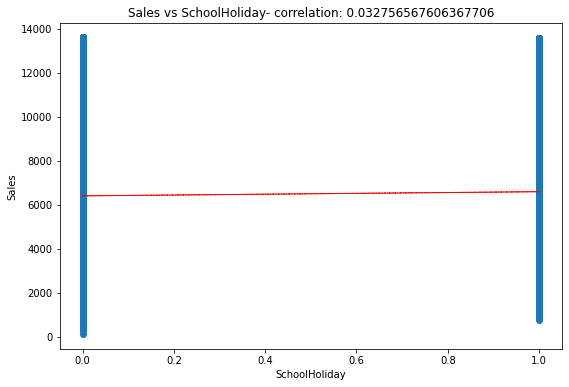

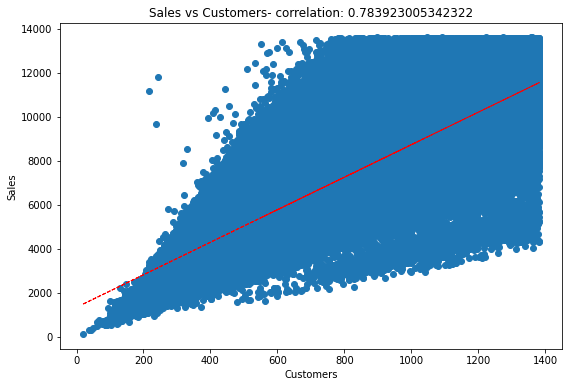

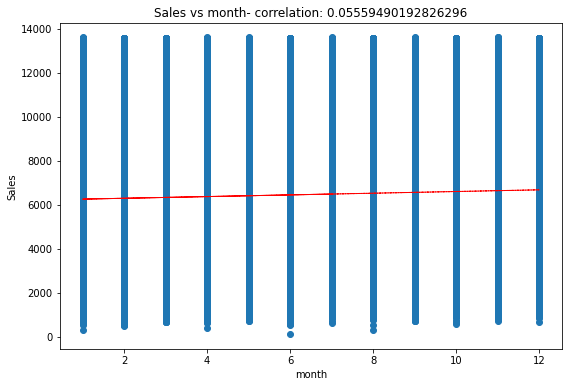

In [ ]:
for col in independent_numerical_varriable:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Sales']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col],df['Sales'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#lets do the heatmap of our independent and dependent varriables

<AxesSubplot:>

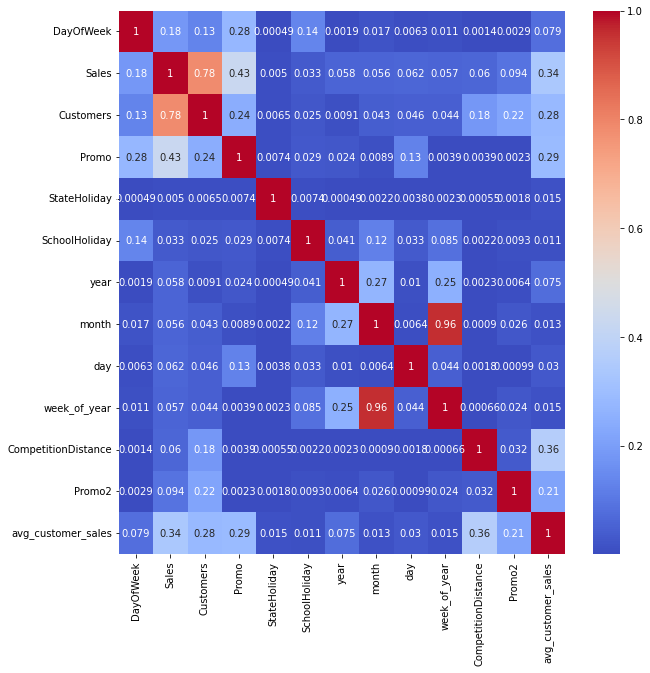

In [ ]:
#following heatmap represents the correlation between the features:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True,cmap='coolwarm')

so from the above correlation matrix we can infer that there is not much correlation between features except the dependency of feature between sales and customer

#checking for multicollinearity among the independent features and dealing with it

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in 'Sales']])

,variables,VIF
0,DayOfWeek,5.875027
1,Customers,11.770449
2,Promo,2.393942
3,StateHoliday,1.001093
4,SchoolHoliday,1.306540
5,year,59.513387
6,month,56.411095
7,day,4.627615
8,week_of_year,50.638231
9,CompetitionDistance,2.208098


In [ ]:
#since the vif of year,month and weak_of_year is predominantly higher so we shall remove it as it is dependent on the independent features
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','year','month','weak_of_year']]])

,variables,VIF
0,DayOfWeek,5.027705
1,Customers,6.872526
2,Promo,2.325312
3,StateHoliday,1.000916
4,SchoolHoliday,1.265453
5,day,4.152266
6,week_of_year,3.642247
7,CompetitionDistance,2.201082
8,Promo2,2.335110
9,avg_customer_sales,15.298758


In [ ]:
#since after doing the second iteration of vif analysis we found that the vif for average customer sales is highest we shall remove this column
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','year','month','weak_of_year','avg_customer_sales']]])


,variables,VIF
0,DayOfWeek,4.274729
1,Customers,6.256554
2,Promo,1.994170
3,StateHoliday,1.000714
4,SchoolHoliday,1.256486
5,day,3.825349
6,week_of_year,3.474249
7,CompetitionDistance,1.749408
8,Promo2,1.986044


In [ ]:
#now talking only those numerical independent features which are useful for our analysis from vif test obtained
numerical_independent_features=list(set(independent_numerical_varriable)-{'year','month','weak_of_year','avg_customer_sales'})
numerical_independent_features

['StateHoliday',
 'day',
 'Promo2',
 'Promo',
 'DayOfWeek',
 'CompetitionDistance',
 'week_of_year',
 'SchoolHoliday',
 'Customers']

#Analysis of categorigal features

In [ ]:
categorical_features=list(df.describe(include=['object','category']).columns)

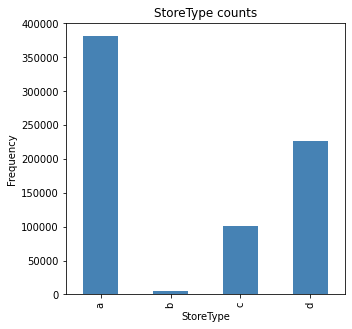

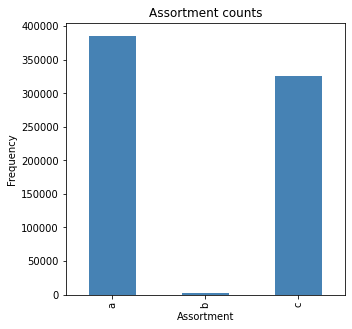

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig,ax=plt.subplots(figsize=(5,5))
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


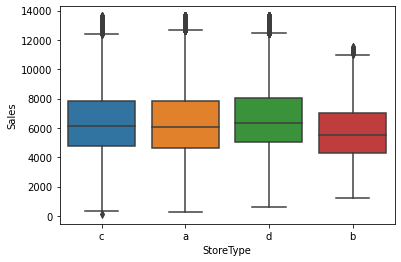

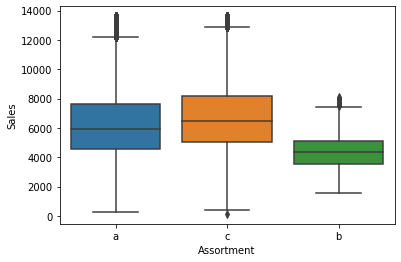

In [ ]:
t=categorical_features
for col in t:
  fig,ax=plt.subplots()
  sns.boxplot(x=col,y='Sales',data=df)

In [ ]:
#let us do the label encoding for categorical features
df=df.replace({'StoreType':{'a':1,'b':2,'c':3,'d':4},'Assortment':{'a':1,'b':2,'c':3}})
df

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2,avg_customer_sales
0,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,3,1,1270.0,0.0,9.482883
1,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,1,1,570.0,1.0,9.702400
2,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,1,1,14130.0,1.0,10.126675
5,5,2015-07-31,5651,589,1,0,1,2015,7,31,31,1,1,310.0,0.0,9.594228
7,5,2015-07-31,8492,833,1,0,1,2015,7,31,31,1,1,7520.0,0.0,10.194478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016606,2,2013-01-01,2646,625,0,1,1,2013,1,1,1,2,2,590.0,1.0,4.233600
1016770,2,2013-01-01,3821,777,0,1,1,2013,1,1,1,2,2,1410.0,0.0,4.917632
1016776,2,2013-01-01,3375,566,0,1,1,2013,1,1,1,2,1,150.0,0.0,5.962898
1016863,2,2013-01-01,5035,1248,0,1,1,2013,1,1,1,2,2,840.0,1.0,4.034455


In [ ]:
#now combining the categorical_features and numerical_independent_fetaures
independent_features=categorical_features+numerical_independent_features
independent_features

['StoreType',
 'Assortment',
 'StateHoliday',
 'day',
 'Promo2',
 'Promo',
 'DayOfWeek',
 'CompetitionDistance',
 'week_of_year',
 'SchoolHoliday',
 'Customers']

In [ ]:
#now standardising the independent features:
x=df[independent_features].apply(zscore)
x

,StoreType,Assortment,StateHoliday,day,Promo2,Promo,DayOfWeek,CompetitionDistance,week_of_year,SchoolHoliday,Customers
0,0.553353,-0.921104,-0.023622,1.751067,-1.074099,1.137517,0.854787,-0.604082,0.525823,2.048072,-0.558914
1,-0.903131,-0.921104,-0.023622,1.751067,0.931013,1.137517,0.854787,-0.778982,0.525823,2.048072,-0.270170
2,-0.903131,-0.921104,-0.023622,1.751067,0.931013,1.137517,0.854787,2.609081,0.525823,2.048072,0.538314
5,-0.903131,-0.921104,-0.023622,1.751067,-1.074099,1.137517,0.854787,-0.843945,0.525823,2.048072,-0.418667
7,-0.903131,-0.921104,-0.023622,1.751067,-1.074099,1.137517,0.854787,0.957526,0.525823,2.048072,0.587813
...,...,...,...,...,...,...,...,...,...,...,...
1016606,-0.174889,0.083841,42.334009,-1.720431,0.931013,-0.879107,-0.901383,-0.773985,-1.570161,2.048072,-0.270170
1016770,-0.174889,0.083841,42.334009,-1.720431,-1.074099,-0.879107,-0.901383,-0.569102,-1.570161,2.048072,0.356818
1016776,-0.174889,-0.921104,42.334009,-1.720431,-1.074099,-0.879107,-0.901383,-0.883922,-1.570161,2.048072,-0.513540
1016863,-0.174889,0.083841,42.334009,-1.720431,0.931013,-0.879107,-0.901383,-0.711520,-1.570161,2.048072,2.299654


In [ ]:
#now doing the log transformation on the dependent feature
dependent_features='Sales'
y=pd.DataFrame(np.log10(df[dependent_features]))
y

,Sales
0,3.721233
1,3.782759
2,3.919810
5,3.752125
7,3.929010
...,...
1016606,3.422590
1016770,3.582177
1016776,3.528274
1016863,3.701999


#lets do the linear regression modeling on our dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) 
print(X_train.shape)
print(X_test.shape)


(570944, 11)
(142737, 11)


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)


0.7476164664708822

In [ ]:
reg.coef_

array([[ 0.02944677,  0.01042361, -0.00249147,  0.00016902,  0.01099464,
         0.03607894, -0.0024173 ,  0.02550876,  0.00318717,  0.00111475,
         0.13022624]])

In [ ]:
reg.intercept_

array([3.78075221])

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([[3.83139683],
       [3.71763744],
       [3.68482721],
       ...,
       [3.7951955 ],
       [3.79700331],
       [3.74712569]])

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1532975.3861185408
RMSE : 1238.1338320708876


In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7067846309635328
Adjusted R2 :  0.7067620324765165


In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7476126470336236

In [ ]:
lasso.coef_

array([ 2.93634850e-02,  1.03677904e-02, -2.38435522e-03,  6.04858575e-05,
        1.08667114e-02,  3.60176117e-02, -2.36556102e-03,  2.54058899e-02,
        3.10269564e-03,  1.03550025e-03,  1.30083697e-01])

In [ ]:
y_pred_lasso=lasso.predict(X_test)
r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7070167337494698
Adjusted R2 :  0.7069941531509149


In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-30,1e-25,1e-20,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-30, 1e-25, 1e-20, 1e-15, 1e-13, 1e-10,
                                   1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 60, 100,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.006650046345869395


In [ ]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)
y_pred_lasso_cv

array([3.83139683, 3.71763744, 3.68482721, ..., 3.7951955 , 3.79700331,
       3.74712569])

In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7067846309635348
Adjusted R2 :  0.7067620324765185


as it is seen that the alpha value predicted by cross validation is tending towards zero so we the penalty term will be close to zero.Hence we can infer that our model is not overfitting.Therefore we need not go for ridge and elastic net regression analysis. 

### Variables Description 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***